<a href="https://colab.research.google.com/github/seon-pegado/Deep-Learning/blob/master/Fruit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import LeakyReLU

In [3]:
BATCH_SIZE = 32
IMG_SIZE = 256
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/dataset/Train',
    batch_size = BATCH_SIZE,
    image_size = (IMG_SIZE, IMG_SIZE),
    seed = 42,
    shuffle = True
)

Found 5842 files belonging to 6 classes.


In [5]:
class_name = dataset.class_names
class_name

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [6]:
len(dataset)

183

In [7]:
len(dataset)*BATCH_SIZE

5856

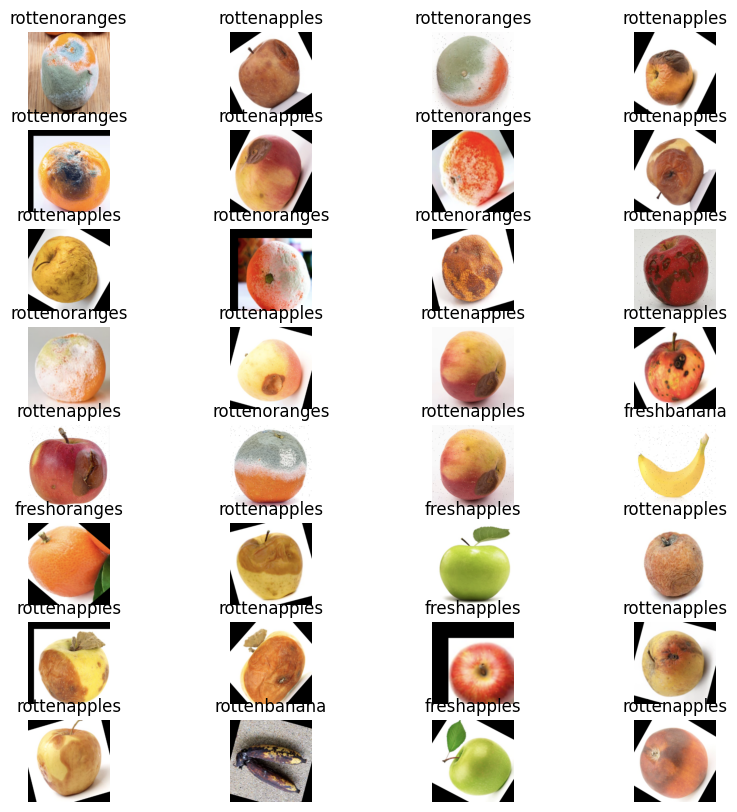

In [22]:
fig = plt.figure(figsize = (10,10))
np.random.seed(56)
for image, label in dataset.take(2):
  for i in range(32):
    ax = plt.subplot(8,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_name[label[i]])

In [9]:
def create_split(ds, train_split=0.8, shuffle=True, shuffle_size=10000):
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed= 42)

  ds_size = len(ds)

  train_size = int(ds_size * train_split)
  train_ds = ds.take(train_size)

  valid_ds = ds.skip(train_size)

  return train_ds, valid_ds

In [10]:
train_ds, valid_ds = create_split(dataset)

In [11]:
len(train_ds), len(valid_ds)

(146, 37)

In [12]:
resize_rescale = keras.models.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [23]:
input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
model = keras.models.Sequential([
    resize_rescale,
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 7, activation = 'softmax')
])

In [24]:
model.build(input_shape = input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (32, 252, 252, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (32, 250, 250, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (32, 4000000)             0         
                                                                 
 dense_1 (Dense)             (32, 7)                   28000007  
                                                                 
Total params: 28056327 (107.03 MB)
Trainable params: 2

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(x = train_ds, epochs = EPOCHS, validation_data = valid_ds)

Epoch 1/10


InvalidArgumentError: ignored